In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.style.use('seaborn-darkgrid')
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/indian-school-education-statistics/dropout-ratio-2012-2015.csv
/kaggle/input/indian-school-education-statistics/percentage-of-schools-with-electricity-2013-2016.csv
/kaggle/input/indian-school-education-statistics/gross-enrollment-ratio-2013-2016.csv
/kaggle/input/indian-school-education-statistics/percentage-of-schools-with-water-facility-2013-2016.csv
/kaggle/input/indian-school-education-statistics/schools-with-boys-toilet-2013-2016.csv
/kaggle/input/indian-school-education-statistics/schools-with-girls-toilet-2013-2016.csv
/kaggle/input/indian-school-education-statistics/percentage-of-schools-with-comps-2013-2016.csv


In [2]:
drop_out_ratio=pd.read_csv('../input/indian-school-education-statistics/dropout-ratio-2012-2015.csv')
drop_out_ratio.head(10)

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
0,A & N Islands,2012-13,0.83,0.51,0.68,Uppe_r_Primary,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14
1,A & N Islands,2013-14,1.35,1.06,1.21,NR,1.54,0.51,8.36,5.98,7.2,18.94,12.2,15.87
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93
3,Andhra Pradesh,2012-13,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NR,0.35
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79
5,Andhra Pradesh,2014-15,6.57,6.89,6.72,5.09,5.32,5.2,15.81,15.6,15.71,NR,NR,NR
6,Arunachal Pradesh,2013-14,11.54,10.22,10.89,4.44,6.74,5.59,16.08,12.75,14.49,18.57,15.49,17.07
7,Arunachal Pradesh,2012-13,15.84,14.44,15.16,5.86,9.06,7.47,13.99,11.77,12.93,7.85,2.14,5.11
8,Arunachal Pradesh,2014-15,11.51,10.09,10.82,5.31,8.08,6.71,18.33,15.81,17.11,19.37,17.44,18.42
9,Assam,2012-13,7.02,5.46,6.24,7.89,6.55,7.2,25.65,27.79,26.77,4.87,4.5,4.69


Tasks
Things we are trying to achieve using the various datasets given.
1. first understand how the data is arranged. 
2. find missing values (if any) and remove them [by dropping or imputing depending on the significance of the instances]
3. Answer the following questions:

Q1.Which states have the highest Dropout Ratio?

Q2.Do boys and girls have enough water and toilet facilities available?

Q3.How is the Gross Enrollment ratio for boys and girls in various levels of schooling life?

Q4.Which level of school life is there less number of enrollment? Is it dropping or increasing?

#  Drop Out Ratio data

In [3]:
drop_out_ratio[drop_out_ratio['Upper Primary_Boys']=='Uppe_r_Primary'].head(10)

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
0,A & N Islands,2012-13,0.83,0.51,0.68,Uppe_r_Primary,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14


In [4]:
drop_out_ratio['Upper Primary_Boys'].loc[0]='NR'

In [5]:
dor=drop_out_ratio.copy()

In [6]:
dor.info()
#here although it seems all have non null values, null values are represented as 'NR'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   State_UT             110 non-null    object
 1   year                 110 non-null    object
 2   Primary_Boys         110 non-null    object
 3   Primary_Girls        110 non-null    object
 4   Primary_Total        110 non-null    object
 5   Upper Primary_Boys   110 non-null    object
 6   Upper Primary_Girls  110 non-null    object
 7   Upper Primary_Total  110 non-null    object
 8   Secondary _Boys      110 non-null    object
 9   Secondary _Girls     110 non-null    object
 10  Secondary _Total     110 non-null    object
 11  HrSecondary_Boys     110 non-null    object
 12  HrSecondary_Girls    110 non-null    object
 13  HrSecondary_Total    110 non-null    object
dtypes: object(14)
memory usage: 12.2+ KB


In [7]:
dor.set_index(['State_UT','year'],inplace=True)

In [8]:
def Replace(vals):
      if(vals=='NR'):
        return np.nan
      else:
        return float(vals)

# all the values are in str type. we must convert them to float64 type
dor=dor.loc[:,'Primary_Boys':].applymap(func=Replace)
dor.reset_index(inplace=True)

dor.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
0,A & N Islands,2012-13,0.83,0.51,0.68,NaN,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14
1,A & N Islands,2013-14,1.35,1.06,1.21,NaN,1.54,0.51,8.36,5.98,7.20,18.94,12.20,15.87
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93
3,Andhra Pradesh,2012-13,3.30,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NaN,0.35
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79


In [9]:
dor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State_UT             110 non-null    object 
 1   year                 110 non-null    object 
 2   Primary_Boys         95 non-null     float64
 3   Primary_Girls        95 non-null     float64
 4   Primary_Total        93 non-null     float64
 5   Upper Primary_Boys   93 non-null     float64
 6   Upper Primary_Girls  102 non-null    float64
 7   Upper Primary_Total  101 non-null    float64
 8   Secondary _Boys      106 non-null    float64
 9   Secondary _Girls     106 non-null    float64
 10  Secondary _Total     106 non-null    float64
 11  HrSecondary_Boys     82 non-null     float64
 12  HrSecondary_Girls    76 non-null     float64
 13  HrSecondary_Total    79 non-null     float64
dtypes: float64(12), object(2)
memory usage: 12.2+ KB


The NaN values in the dataset depends on each state. So imputing the dataset wont return accurate results. Thus we are using groupby() and finding the mean and assigning that to the NaN values. Although this method will clean some data, there are some states where data is not known for all the three years given. In those cases, we are dropping those rows.

In [10]:
#some states have different number of spaces at different years. This is will tamper with grouping the data
def remove_spaces(vals):
  if (' ' in vals):
    return vals.replace(' ','')
  elif('  ' in vals):
    return vals.replace('  ','')
  else:
    return vals

dor['State_UT']=dor['State_UT'].apply(func=remove_spaces)


In [11]:
dor[dor['State_UT']=='Kerala']
# as you can see, a lot of data here is NaN across all three years. We must drop such rows since the mean() will be a NaN as well.

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
51,Kerala,2012-13,NaN,NaN,NaN,NaN,NaN,NaN,12.31,6.38,9.45,NaN,NaN,NaN
52,Kerala,2013-14,NaN,NaN,NaN,NaN,NaN,NaN,17.30,11.40,14.46,6.95,5.9,6.40
53,Kerala,2014-15,NaN,NaN,NaN,NaN,0.0,NaN,14.96,9.52,12.32,1.54,NaN,0.47


In [12]:
df=dor.groupby('State_UT').transform(lambda x: x.fillna(np.mean(x)))
df.insert(0,'State_UT',dor['State_UT'])
df.insert(1,'year',dor['year'])
df.dropna(inplace=True)
#df is the final, cleaned data.

with this, the data has been cleaned and can now be explored

pivoting the dataframe for plotting using seaborn barplot.
(https://stackoverflow.com/questions/38807895/seaborn-multiple-barplots)

In [13]:
dp=df.copy()
dp=dp.groupby('year').mean()
dp.reset_index(inplace=True)


boys=['Primary_Boys','Upper Primary_Boys','Secondary _Boys','HrSecondary_Boys']
girls=['Primary_Girls','Upper Primary_Girls','Secondary _Girls','HrSecondary_Girls']
dp_boys=pd.melt(dp,id_vars=['year'], value_vars=boys )
dp_girls= pd.melt(dp,id_vars=['year'],value_vars=girls)

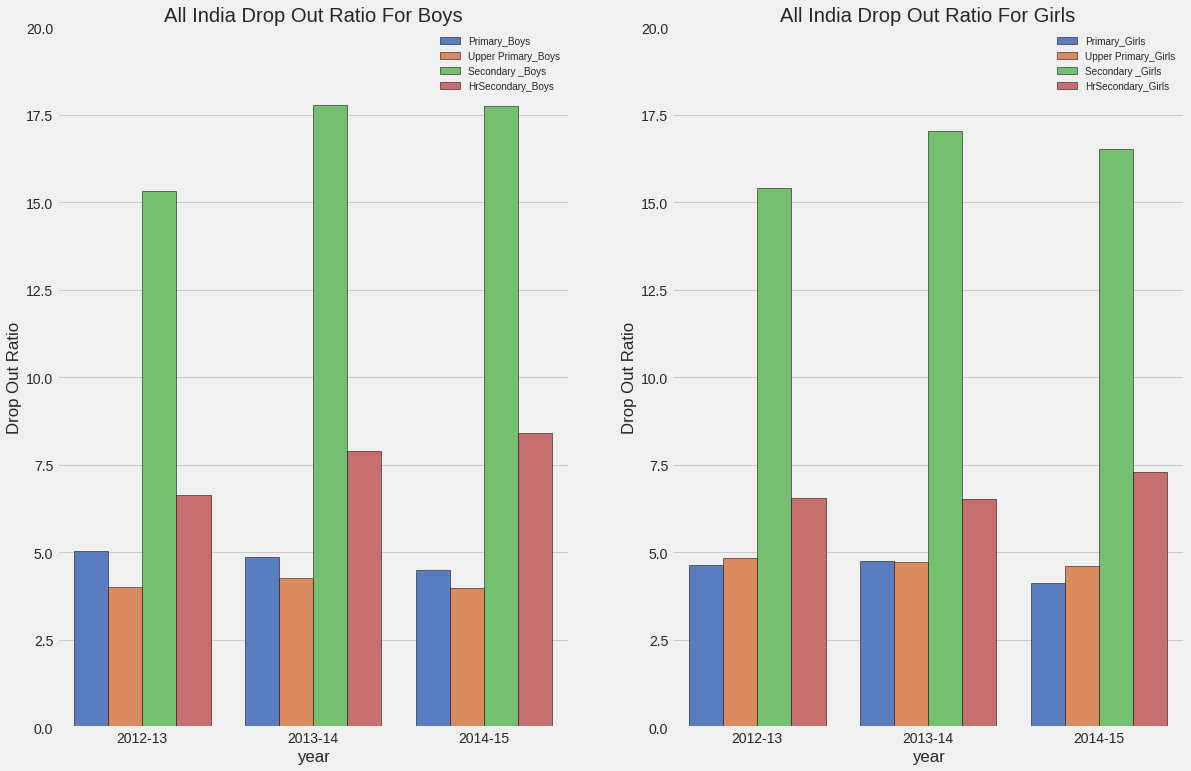

In [14]:
plt.style.use('fivethirtyeight')

f,ax= plt.subplots(1,2,figsize=(18,12))
#sns barplot for boys
ax1= sns.barplot(x='year',y='value',hue='variable', data=dp_boys, palette='muted',edgecolor='black',ax=ax[0])
ax1.legend(fancybox=True,prop={'size':10})
ax1.set(ylim=(0,20))
ax[0].set_title('All India Drop Out Ratio For Boys')
ax[0].set_ylabel('Drop Out Ratio')

#sns barplot for girls
ax2=sns.barplot(x='year',y='value',hue='variable', data=dp_girls, palette='muted',edgecolor='black',ax=ax[1])
ax2.legend(fancybox=True,prop={'size':10})
ax2.set(ylim=(0,20))
ax[1].set_title('All India Drop Out Ratio For Girls')
ax[1].set_ylabel('Drop Out Ratio')
plt.show()

Creating a function to analyze drop out rates in a given state at each given education level

In [15]:
def plot_drop_out_wrt_state(df,state_name):
  %matplotlib inline
  plt.style.use('fivethirtyeight')

  df=df[df['State_UT']==state_name]
  years=df['year'].values
  #set barwidth
  bar_width=0.1
  #set figure
  fig=plt.figure()
  ax=fig.add_axes([5,5,2,2])
  #bar positions for X axis
  x_indexes= np.arange(len(df['Primary_Boys']))

  ax.bar(x_indexes,df['Primary_Girls'],width=bar_width,color='#FFC300',edgecolor='white', label='Primary Girls')
  ax.bar(x_indexes+bar_width,df['Primary_Boys'],width=bar_width,color='#DAF7A6',edgecolor='white', label='Primary Boys')
  ax.bar(x_indexes+2*bar_width,df['Upper Primary_Boys'],width=bar_width,color='#0071FB',edgecolor='white', label='Upper Primary Boys')
  ax.bar(x_indexes+3*bar_width,df['Upper Primary_Girls'],width=bar_width,color='#0BE1AC',edgecolor='white', label='Upper Primary Girls')
  ax.bar(x_indexes+4*bar_width,df['Secondary _Boys'],width=bar_width,color='#8B0BE1',edgecolor='white', label='Secondary Boys')
  ax.bar(x_indexes+5*bar_width,df['Secondary _Girls'],width=bar_width,color='#900C3F',edgecolor='white', label='Secondary Girls')
  ax.bar(x_indexes+6*bar_width,df['HrSecondary_Boys'],width=bar_width,color='#E10B7D',edgecolor='white', label='HrSecondary Boys')
  ax.bar(x_indexes+7*bar_width,df['HrSecondary_Girls'],width=bar_width,color='#FB0000',edgecolor='white', label='HrSecondary Girls')

  #adding ticks and label names
  plt.xticks([r+bar_width for r in x_indexes],years)# this creates the ticks at the x axis at the appropriate distance
  #plt.ylabel('Drop out Ratio')
  plt.xlabel('YEAR')

  #showing plot
  plt.title(state_name,fontweight='bold')
  plt.legend()
  plt.show()

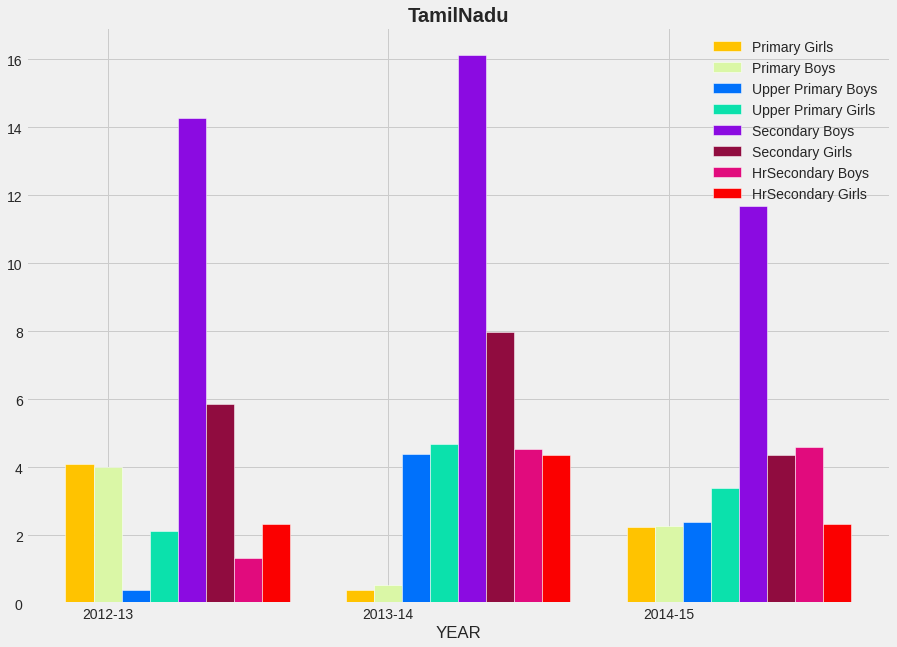

In [16]:
dp=df.copy() # copy for plotting a bar plot
plot_drop_out_wrt_state(dp,'TamilNadu')

Plotting a heat map to see which state has the highest drop out ratio

In [17]:
dp_hm=df.copy() # copy for heat map plotting
dp_hm.drop(['year','Primary_Total','Upper Primary_Total','Secondary _Total','HrSecondary_Total'],axis=1,inplace=True)
dp_hm.drop(index=dp_hm[dp_hm['State_UT']=='AllIndia'].index,inplace=True)


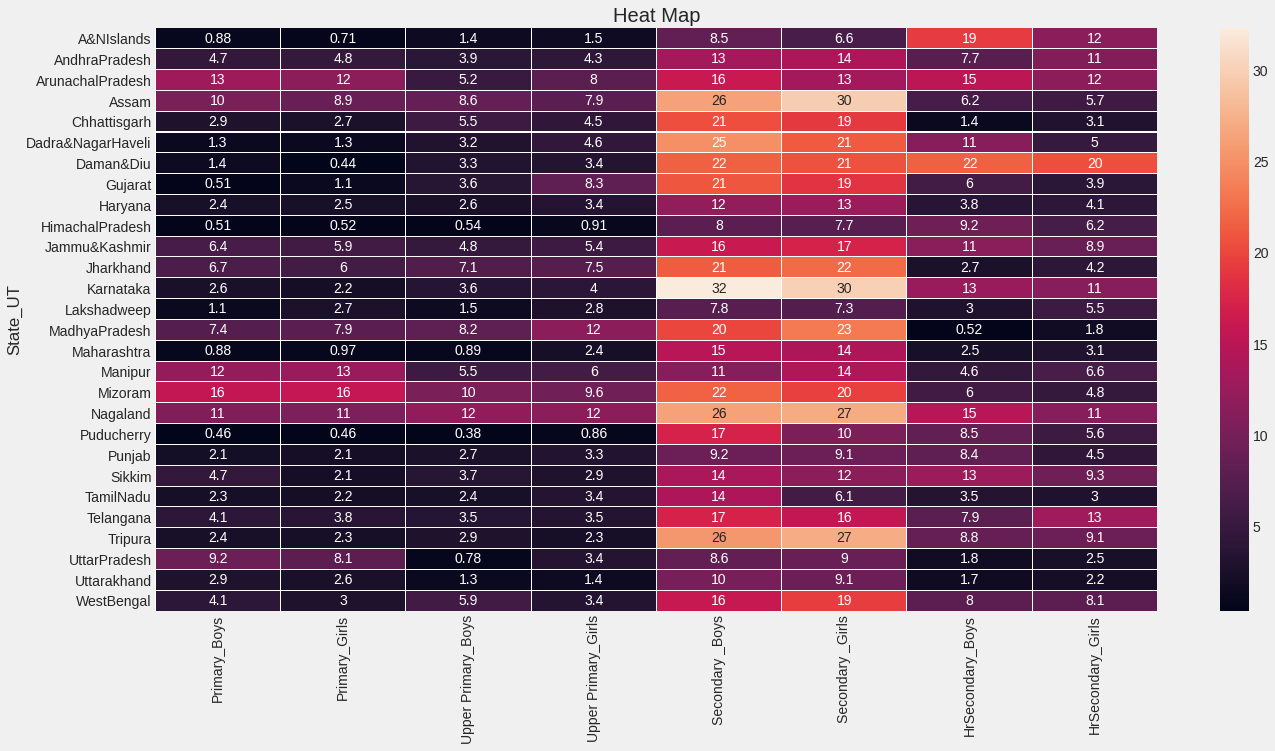

In [18]:
dp_hm=dp_hm.groupby('State_UT').mean()
plt.style.use('fivethirtyeight')

ax=plt.subplots(figsize=(20,10))
ax=sns.heatmap(dp_hm,linewidths=0.02,annot=True)
plt.title('Heat Map')
plt.show()

From the above heat map, it can be seen that Karnataka has the highest drop out rate, especially amoung Secondary boys and girls

# School Amenities Data

In [19]:
gtoilet = pd.read_csv('/kaggle/input/indian-school-education-statistics/schools-with-girls-toilet-2013-2016.csv')
btoilet = pd.read_csv('/kaggle/input/indian-school-education-statistics/schools-with-boys-toilet-2013-2016.csv')

In [20]:
gtoilet.State_UT = gtoilet.State_UT.str.capitalize()
gtoil = gtoilet[gtoilet.State_UT == 'All india']
gtoil = gtoil.iloc[:,[0,1,2,5,9,11,12]]
gtoil = pd.melt(gtoil, id_vars=['State_UT', 'year'], value_vars= gtoil.iloc[:,2:6])

btoilet.State_UT = btoilet.State_UT.str.capitalize()
btoil = btoilet[btoilet.State_UT == 'All india']
btoil = btoil.iloc[:,[0,1,2,5,9,11,12]]
btoil = pd.melt(btoil, id_vars=['State_UT', 'year'], value_vars= btoil.iloc[:,2:6])

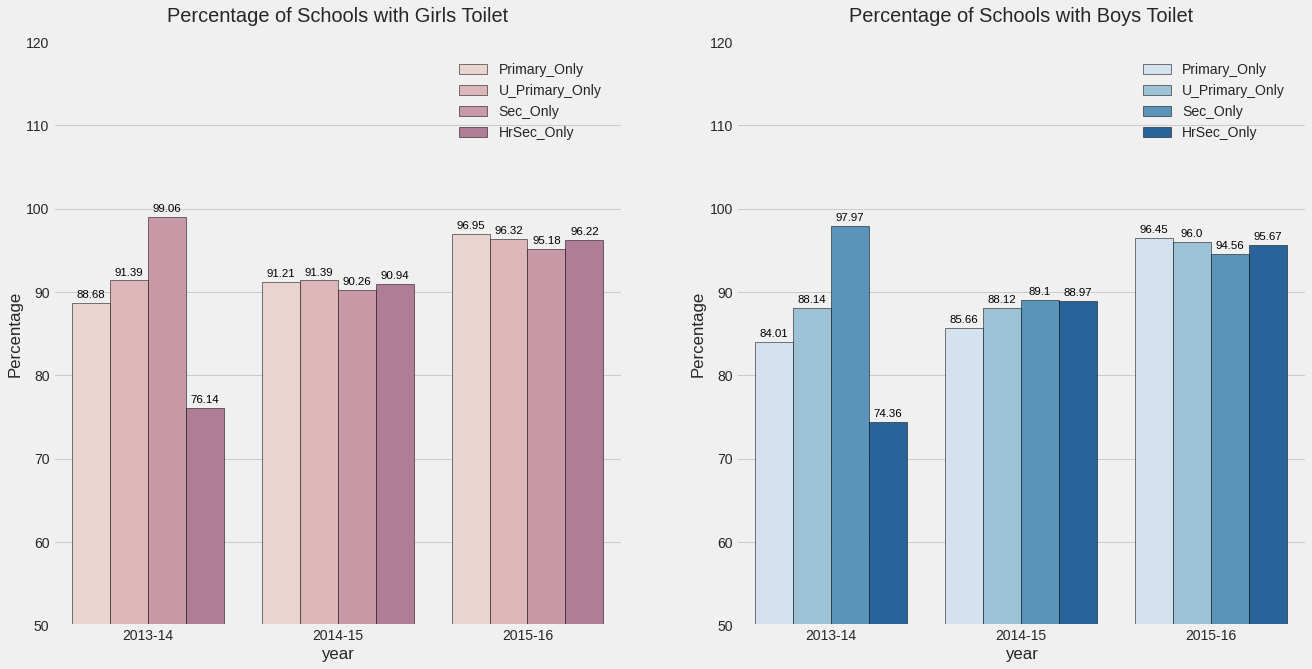

In [21]:
plt.style.use('fivethirtyeight')
f, axes = plt.subplots(1, 2, figsize=(20, 10))

ax1 = sns.barplot(x = 'year' , y = "value" ,hue = "variable", data = gtoil, palette = sns.cubehelix_palette(8), edgecolor = 'black',ax=axes[0])
ax1.set(ylim=(50, 120))
axes[0].set_title('Percentage of Schools with Girls Toilet',size = 20 , pad = 20)
axes[0].set_ylabel('Percentage')
ax1.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
for p in ax1.patches:
             ax1.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11.5, color='black', xytext=(0, 8),
                 textcoords='offset points')
ax2 = sns.barplot(x = 'year' , y = "value" ,hue = "variable", data = btoil, palette = 'Blues', edgecolor = 'black',ax=axes[1])
ax2.set(ylim=(50, 120))
axes[1].set_title('Percentage of Schools with Boys Toilet',size = 20 , pad = 20)
axes[1].set_ylabel('Percentage')
ax2.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
for p in ax2.patches:
             ax2.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11.5, color='black', xytext=(0, 8),
                 textcoords='offset points')

Two insights can be gained from here:


1.   There was a sudden sharp decrease in the number of toilets boys and girls who are in secondary level education.
2.   There has been an overall net increase in the number of toilets available for boy and girls (especially higher secondary level).



# Gross Enrollment Ratio

In [22]:
enroll=pd.read_csv('/kaggle/input/indian-school-education-statistics/gross-enrollment-ratio-2013-2016.csv')
enroll.head(10)

,State_UT,Year,Primary_Boys,Primary_Girls,Primary_Total,Upper_Primary_Boys,Upper_Primary_Girls,Upper_Primary_Total,Secondary_Boys,Secondary_Girls,Secondary_Total,Higher_Secondary_Boys,Higher_Secondary_Girls,Higher_Secondary_Total
0,Andaman & Nicobar Islands,2013-14,95.88,91.97,93.93,94.70,88.98,91.83,102.89,97.36,100.16,105.4,96.61,101.28
1,Andhra Pradesh,2013-14,96.62,96.87,96.74,82.81,84.38,83.57,73.76,76.77,75.20,59.83,60.83,60.3
2,Arunachal Pradesh,2013-14,129.12,127.77,128.46,112.64,115.27,113.94,88.37,84.89,86.65,65.16,65.38,65.27
3,Assam,2013-14,111.77,115.16,113.43,87.85,98.69,93.13,65.60,77.20,71.21,31.78,34.27,32.94
4,Bihar,2013-14,95.03,101.15,97.96,80.60,94.92,87.24,57.66,62.96,60.08,23.33,24.17,23.7
5,Chandigarh,2013-14,88.42,96.09,91.85,99.93,103.02,101.27,92.08,92.16,92.11,90.5,92.88,91.49
6,Chhattisgarh,2013-14,104.06,103.93,103.99,100.35,101.10,100.72,96.68,99.32,97.99,58.27,56.16,57.23
7,Dadra & Nagar Haveli,2013-14,89.50,81.89,85.78,100.76,91.43,96.22,87.79,79.08,83.66,37.77,41.99,39.64
8,Daman & Diu,2013-14,87.80,89.78,88.69,84.06,90.61,86.97,67.94,82.20,73.88,34.37,64.55,44.36
9,Delhi,2013-14,108.78,112.95,110.67,117.76,129.50,122.91,102.02,102.86,102.40,98.88,102.3,100.42


In [23]:
def remove_spaces(vals):
  if (' ' in vals):
    return vals.replace(' ','')
  elif('  ' in vals):
    return vals.replace('  ','')
  else:
    return vals

enroll['State_UT']=dor['State_UT'].apply(func=remove_spaces)

In [24]:
#enroll.State_UT = enroll.State_UT.str.capitalize()
enroll = enroll.replace('NR', np.nan, regex=True)
enroll = enroll.replace('@', np.nan, regex=True)

In [25]:
for i in (enroll.columns[11:14]):
  enroll[i]=enroll[i].astype(float)
enroll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State_UT                110 non-null    object 
 1   Year                    110 non-null    object 
 2   Primary_Boys            110 non-null    float64
 3   Primary_Girls           110 non-null    float64
 4   Primary_Total           110 non-null    float64
 5   Upper_Primary_Boys      110 non-null    float64
 6   Upper_Primary_Girls     110 non-null    float64
 7   Upper_Primary_Total     110 non-null    float64
 8   Secondary_Boys          110 non-null    float64
 9   Secondary_Girls         110 non-null    float64
 10  Secondary_Total         110 non-null    float64
 11  Higher_Secondary_Boys   108 non-null    float64
 12  Higher_Secondary_Girls  108 non-null    float64
 13  Higher_Secondary_Total  108 non-null    float64
dtypes: float64(12), object(2)
memory usage: 12

In [26]:
dp=enroll.copy()
dp=dp.groupby('Year').mean()
dp.reset_index(inplace=True)

boys=['Primary_Boys','Upper_Primary_Boys','Secondary_Boys','Higher_Secondary_Boys']
girls=['Primary_Girls','Upper_Primary_Girls','Secondary_Girls','Higher_Secondary_Girls']
dp_boys=pd.melt(dp,id_vars=['Year'], value_vars=boys )
dp_girls= pd.melt(dp,id_vars=['Year'],value_vars=girls)



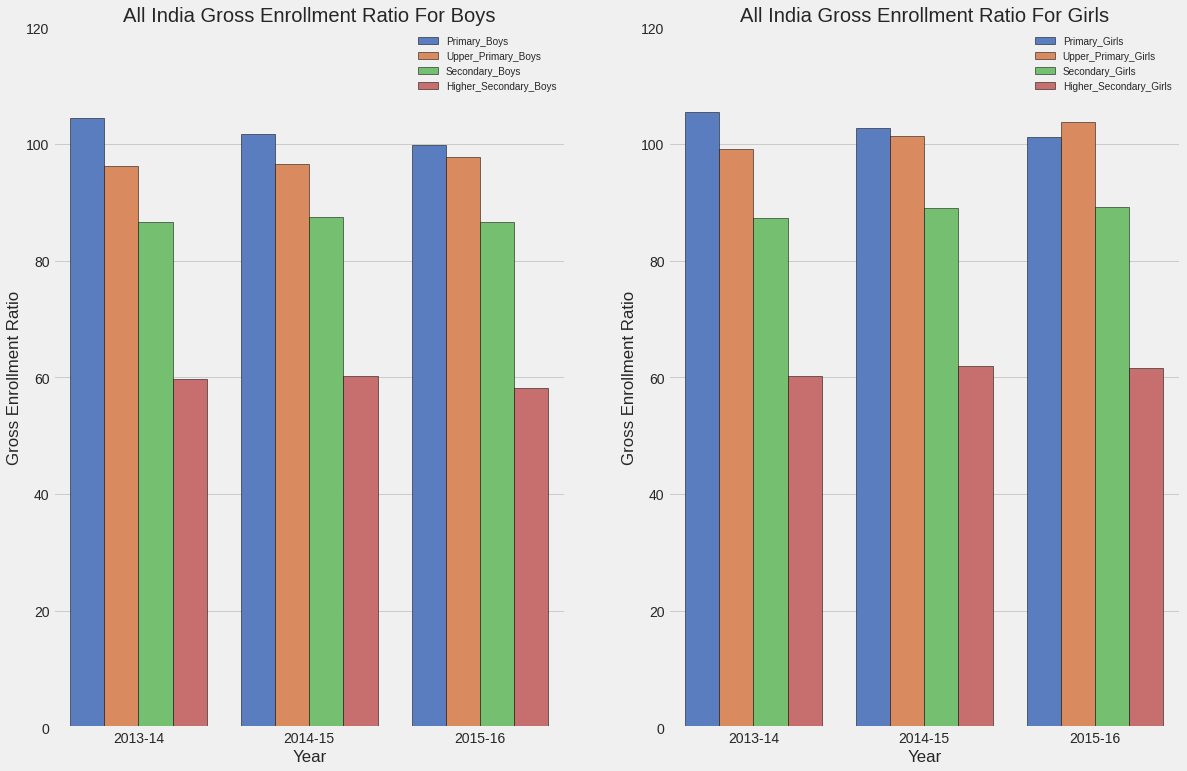

In [27]:
plt.style.use('fivethirtyeight')

f,ax= plt.subplots(1,2,figsize=(18,12))
#sns barplot for boys
ax1= sns.barplot(x='Year',y='value',hue='variable', data=dp_boys, palette='muted',edgecolor='black',ax=ax[0])
ax1.legend(fancybox=True,prop={'size':10})
ax1.set(ylim=(0,120))
ax[0].set_title('All India Gross Enrollment Ratio For Boys')
ax[0].set_ylabel('Gross Enrollment Ratio')

#sns barplot for girls
ax2=sns.barplot(x='Year',y='value',hue='variable', data=dp_girls, palette='muted',edgecolor='black',ax=ax[1])
ax2.legend(fancybox=True,prop={'size':10})
ax2.set(ylim=(0,120))
ax[1].set_title('All India Gross Enrollment Ratio For Girls')
ax[1].set_ylabel('Gross Enrollment Ratio')
plt.show()

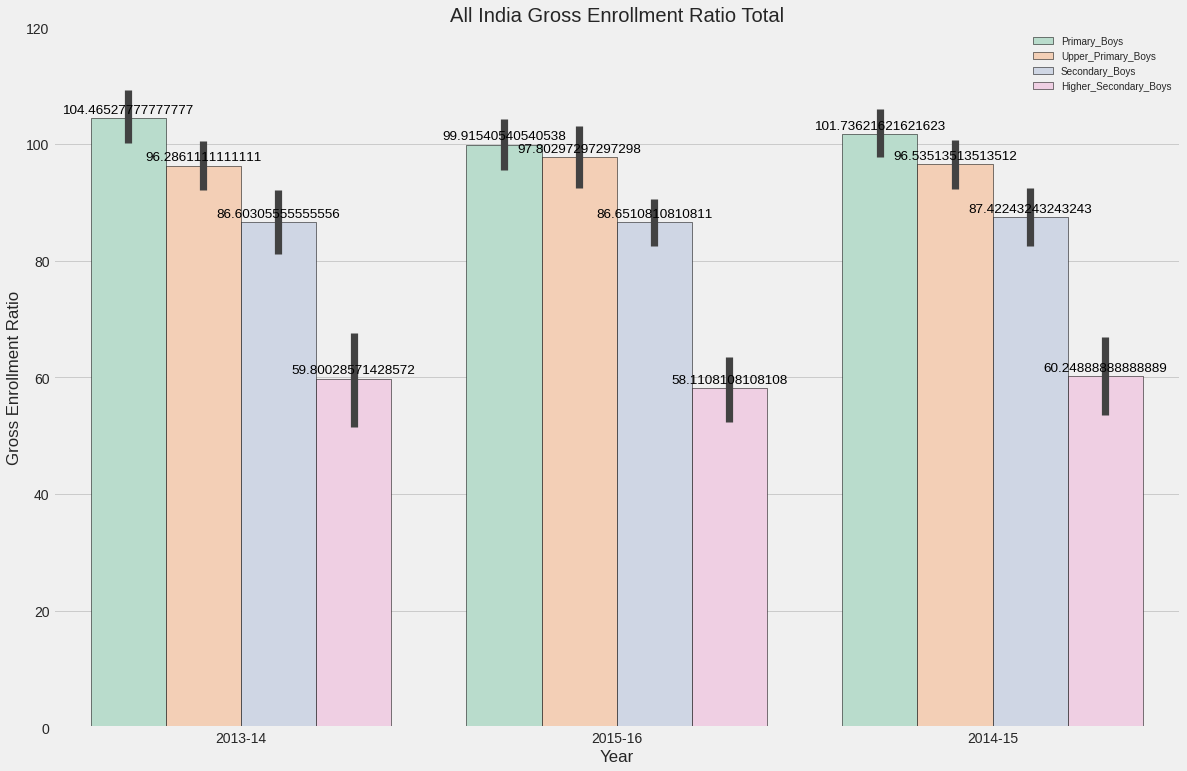

In [28]:
total=['Primary_Total','Upper Primary_Total','Secondary _Total','HrSecondary_Total']
dp_total=pd.melt(enroll,id_vars=['Year'], value_vars=boys )

plt.style.use('fivethirtyeight')

f,ax= plt.subplots(figsize=(18,12))
#sns barplot for boys
ax1= sns.barplot(x='Year',y='value',hue='variable', data=dp_total, palette='Pastel2',edgecolor='black')
ax1.legend(fancybox=True,prop={'size':10})
ax1.set(ylim=(0,120))
ax.set_title('All India Gross Enrollment Ratio Total')
ax.set_ylabel('Gross Enrollment Ratio')

for p in (ax1.patches):
  ax1.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13.5, color='black', xytext=(0, 8),
                 textcoords='offset points')
plt.show()


The education level with lowest enrollment ratio is higher secondary. If the trend on the data given continues, it would seem to be increasing but in a very slow rate. 